In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import sympy as sym


In [2]:
temperature = ctrl.Antecedent(np.arange(0, 11, 1), 'temperature')
AC = ctrl.Antecedent(np.arange(0, 11, 1), 'AC')
fanspeed = ctrl.Consequent(np.arange(0, 26, 1), 'fanspeed')


In [3]:
temperature.automf(3)
AC.automf(3)

In [4]:
fanspeed['low'] = fuzz.trimf(fanspeed.universe, [0, 0, 17])
fanspeed['medium'] = fuzz.trimf(fanspeed.universe, [0, 17, 50])
fanspeed['high'] = fuzz.trimf(fanspeed.universe, [17, 17, 50])

C:\Users\Varad Junnarkar\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


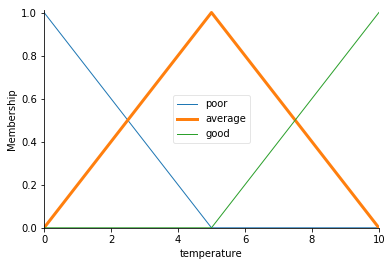

In [5]:
temperature['average'].view()


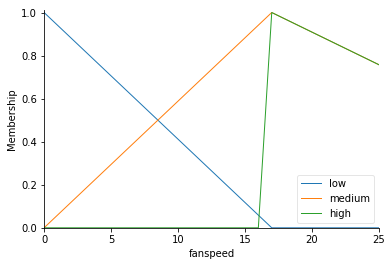

In [6]:
fanspeed.view()

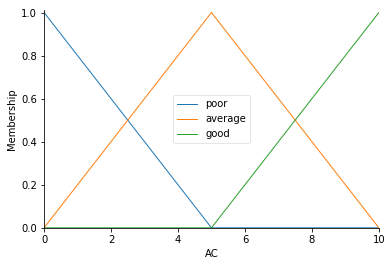

In [7]:
AC.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x153d7471080>)

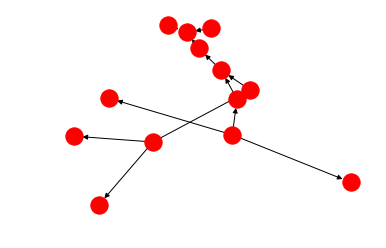

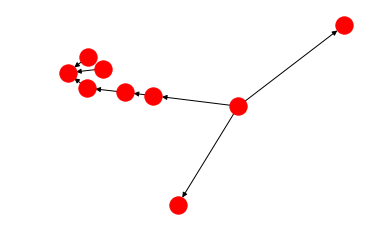

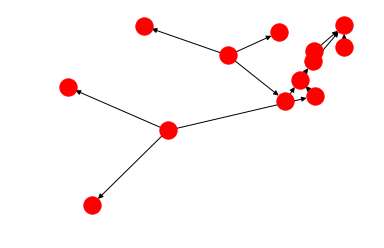

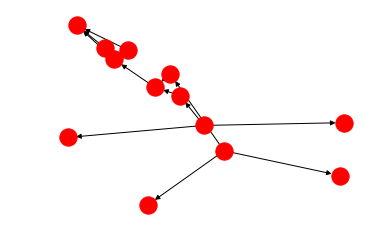

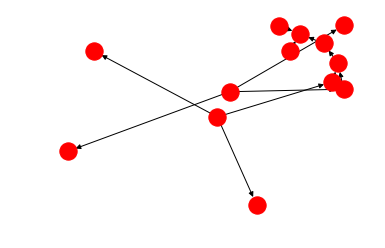

In [8]:
rule1 = ctrl.Rule(temperature['poor'] & AC['poor'], fanspeed['high'])
rule2 = ctrl.Rule(temperature['average'], fanspeed['low'])
rule3 = ctrl.Rule(temperature['poor'] & AC['good'], fanspeed['low'])
rule4 = ctrl.Rule(temperature['good'] & AC['good'],fanspeed['high'])
rule5 = ctrl.Rule(temperature['good'] & AC['poor'],fanspeed['low'])
rule1.view()
rule2.view()
rule3.view()
rule4.view()
rule5.view()

In [9]:
fanspeed_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5])

In [10]:
Outputfs = ctrl.ControlSystemSimulation(fanspeed_ctrl)

In [14]:
Outputfs.input['AC'] =7.0
Outputfs.input['temperature'] =4.5
Outputfs.compute()

5.718181818181819


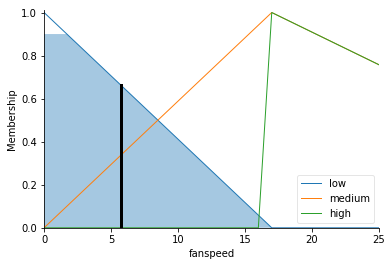

In [15]:
print (Outputfs.output['fanspeed'])
fanspeed.view(sim=Outputfs)